In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3 
%matplotlib inline

# 5.1 이차원 이산형 확률변수

## 5.1.1 1차원 이산형 확률변수의 정의

### 확률질량함수

In [2]:
x_set = np.array([1, 2, 3, 4, 5, 6])

In [3]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [4]:
X = [x_set, f]

In [5]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

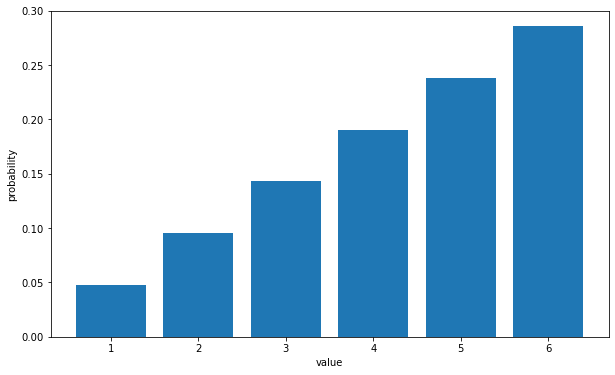

In [6]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

### 확률의 성질

In [7]:
np.all(prob >= 0)

True

In [8]:
np.sum(prob)

0.9999999999999999

### 누적분포함수

In [9]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [10]:
F(3)

0.2857142857142857

### 확률변수의 변환

In [11]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

## 5.1.2 1차원 이산형 확률변수의 지표

In [12]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [13]:
sample = np.random.choice(x_set, int(1e6), p = prob)
np.mean(sample)

4.333499

In [16]:
def E(X, g = lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [17]:
E(X)

4.333333333333333

In [18]:
E(X, g = lambda x: 2*x + 3)

11.666666666666664

In [19]:
2 * E(X) + 3

11.666666666666666

### 분산

In [20]:
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [21]:
def V(X, g = lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

In [22]:
V(X)

2.2222222222222223

In [23]:
V(X, lambda x: 2*x + 3)

8.88888888888889

In [24]:
2**2 * V(X)

8.88888888888889

# 5.2 2차원 이산형 확률변수

## 5.2.1 2차원 이산형 확률변수의 정의

### 결합확률분포

### 확률의 성질

In [25]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [26]:
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [27]:
XY = [x_set, y_set, f_XY]

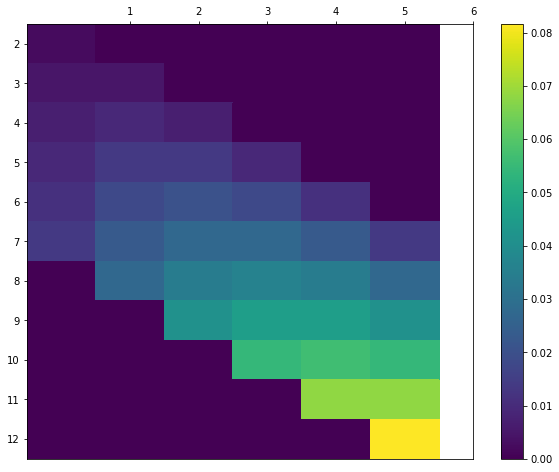

In [28]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 1.5, minor = False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor = False)
ax.set_xticklabels(np.arange(1, 7), minor = False)
ax.set_yticklabels(np.arange(2, 13), minor = False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax = ax)
plt.show()

In [29]:
np.all(prob >= 0)

True

In [30]:
np.sum(prob)

1.0

### 주변확률분포

In [31]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [32]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [33]:
X = [x_set, f_X]
Y = [y_set, f_Y]

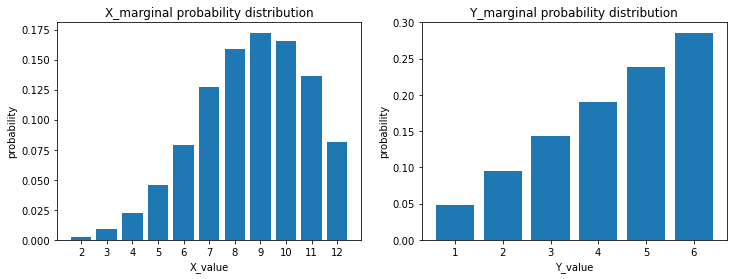

In [36]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set]) 

fig = plt.figure(figsize = (12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

## 5.2.2 2차원 이산형 확률변수의 지표

### 기댓값

In [37]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [38]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [39]:
mean_X = E(XY, lambda x,y : x)
mean_X

8.666666666666666

In [40]:
mean_Y = E(XY, lambda x,y : y)
mean_Y

4.333333333333333

In [41]:
a, b = 2, 3

In [42]:
E(XY, lambda x,y : a*x + b*y)

30.333333333333332

In [43]:
a * mean_X + b * mean_Y

30.333333333333332

### 분산

In [44]:
np.sum([(x_i - mean_X)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

4.444444444444444

In [45]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j) - mean)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [46]:
var_X = V(XY, g = lambda x,y : x)
var_X

4.444444444444444

In [47]:
var_Y = V(XY, g = lambda x,y : y)
var_Y

2.2222222222222223

### 공분산

In [48]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x,y : x)
    mean_Y = E(XY, lambda x,y : y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [49]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [50]:
V(XY, lambda x,y : a*x + b*y)

64.44444444444444

In [51]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

### 상관계수

In [52]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474